# Banking - MLP

In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df=pd.read_csv("banking.csv")
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [613]:
df.shape

(164309, 14)

In [614]:
df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [615]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [616]:
# Lay cac cot Categorical
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'object') & (feature != 'y'))]
categorical_features

['Loan_Amount_Requested',
 'Length_Employed',
 'Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender']

In [617]:
# Lay cac cot Numeric
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
numerical_features

['Loan_ID',
 'Annual_Income',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Interest_Rate']

In [618]:
for values in categorical_features:
    if(len(df[values].unique()) < 15):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

Loan_Amount_Requested : 1290
Length_Employed : ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years'] 12
Home_Owner : ['Rent' 'Mortgage' nan 'Own' 'Other'] 5
Income_Verified : ['not verified' 'VERIFIED - income' 'VERIFIED - income source'] 3
Purpose_Of_Loan : ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy'] 14
Gender : ['Female' 'Male'] 2


In [619]:
for values in numerical_features:
    if(len(df[values].unique()) < 7):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

Loan_ID : 164309
Annual_Income : 12306
Debt_To_Income : 3953
Inquiries_Last_6Mo : 9
Months_Since_Deliquency : 123
Number_Open_Accounts : 58
Total_Accounts : 100
Interest_Rate : [1 3 2] 3


### Deal with categorical feature

In [620]:
df[categorical_features]

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female
...,...,...,...,...,...,...
164304,"20,725",10+ years,Rent,VERIFIED - income source,credit_card,Male
164305,"6,000",8 years,Own,VERIFIED - income source,small_business,Male
164306,"20,250",10+ years,Mortgage,VERIFIED - income,credit_card,Male
164307,"10,000",4 years,Rent,not verified,major_purchase,Female


In [621]:
df[categorical_features].isnull().sum()

Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25359
Income_Verified              0
Purpose_Of_Loan              0
Gender                       0
dtype: int64

Loan_Amount_Requested

In [622]:
df['Loan_Amount_Requested'].value_counts()

Loan_Amount_Requested
10,000    11622
12,000     9018
15,000     8459
20,000     7993
35,000     5844
          ...  
29,650        1
32,450        1
26,425        1
27,950        1
29,825        1
Name: count, Length: 1290, dtype: int64

In [623]:
df['Loan_Amount_Requested'] = pd.to_numeric(df['Loan_Amount_Requested'].str.replace(',','.'))

In [624]:
df['Loan_Amount_Requested'].describe()

count    164309.000000
mean         14.383537
std           9.649422
min           1.000000
25%           8.000000
50%          12.075000
75%          20.000000
max         950.000000
Name: Loan_Amount_Requested, dtype: float64

Length_Employed

In [625]:
value_counts = df['Length_Employed'].value_counts()
value_counts

Length_Employed
10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: count, dtype: int64

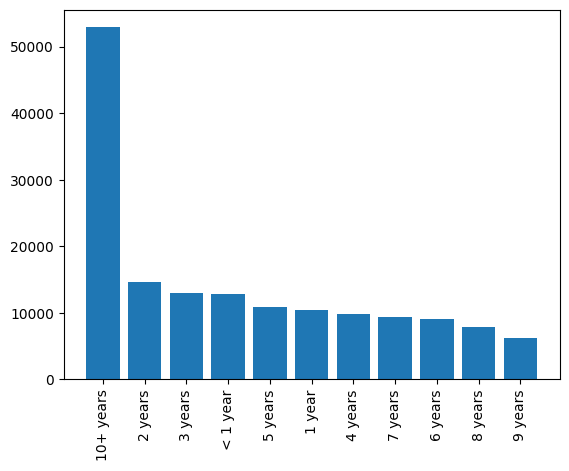

In [626]:
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation='vertical')
plt.show()

In [627]:
df['Length_Employed'] = df['Length_Employed'].fillna(method='backfill')
df['Length_Employed'],_ = pd.factorize(df['Length_Employed'])
df['Length_Employed'].value_counts()

Length_Employed
5     55422
4     15300
9     13529
0     13444
10    11348
6     10893
1     10214
2      9726
7      9500
3      8339
8      6594
Name: count, dtype: int64

Home_Owner

In [628]:
value_counts = df['Home_Owner'].value_counts()
value_counts

Home_Owner
Mortgage    70345
Rent        56031
Own         12525
Other          49
Name: count, dtype: int64

In [629]:
df['Home_Owner'] = df['Home_Owner'].fillna(method='backfill')
df['Home_Owner'], _ = pd.factorize(df['Home_Owner'])
df['Home_Owner'].value_counts()

Home_Owner
1    83136
0    66445
2    14667
3       61
Name: count, dtype: int64

In [630]:
df['Home_Owner'] = df['Home_Owner'].replace(3, 2)

Income_Verified

In [631]:
df['Income_Verified'].value_counts()

Income_Verified
VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: count, dtype: int64

In [632]:
df['Income_Verified'], _ = pd.factorize(df['Income_Verified'])
df['Income_Verified'].value_counts()

Income_Verified
1    59421
2    53015
0    51873
Name: count, dtype: int64

Purpose_Of_Loan

In [633]:
df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: count, dtype: int64

In [634]:
df['Purpose_Of_Loan'], _ = pd.factorize(df['Purpose_Of_Loan'])
df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
1     97101
2     36684
3      9269
5      8346
4      3435
7      2392
0      1885
6      1541
8       974
10      837
9       828
11      773
13      123
12      121
Name: count, dtype: int64

Gender

In [635]:
df['Gender'].value_counts()

Gender
Male      117176
Female     47133
Name: count, dtype: int64

In [636]:
df['Gender'], _ = pd.factorize(df['Gender'])
df['Gender'].value_counts()

Gender
1    117176
0     47133
Name: count, dtype: int64

### Deal with Numerical feature

In [637]:
numerical_features.pop(-1)
numerical_features.append('Loan_Amount_Requested')

In [638]:
df[numerical_features].describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Loan_Amount_Requested
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,14.383537
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,9.649422
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,8.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,12.075000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,20.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,950.000000


In [639]:
df[numerical_features].isnull().sum()

Loan_ID                        0
Annual_Income              25102
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Loan_Amount_Requested          0
dtype: int64

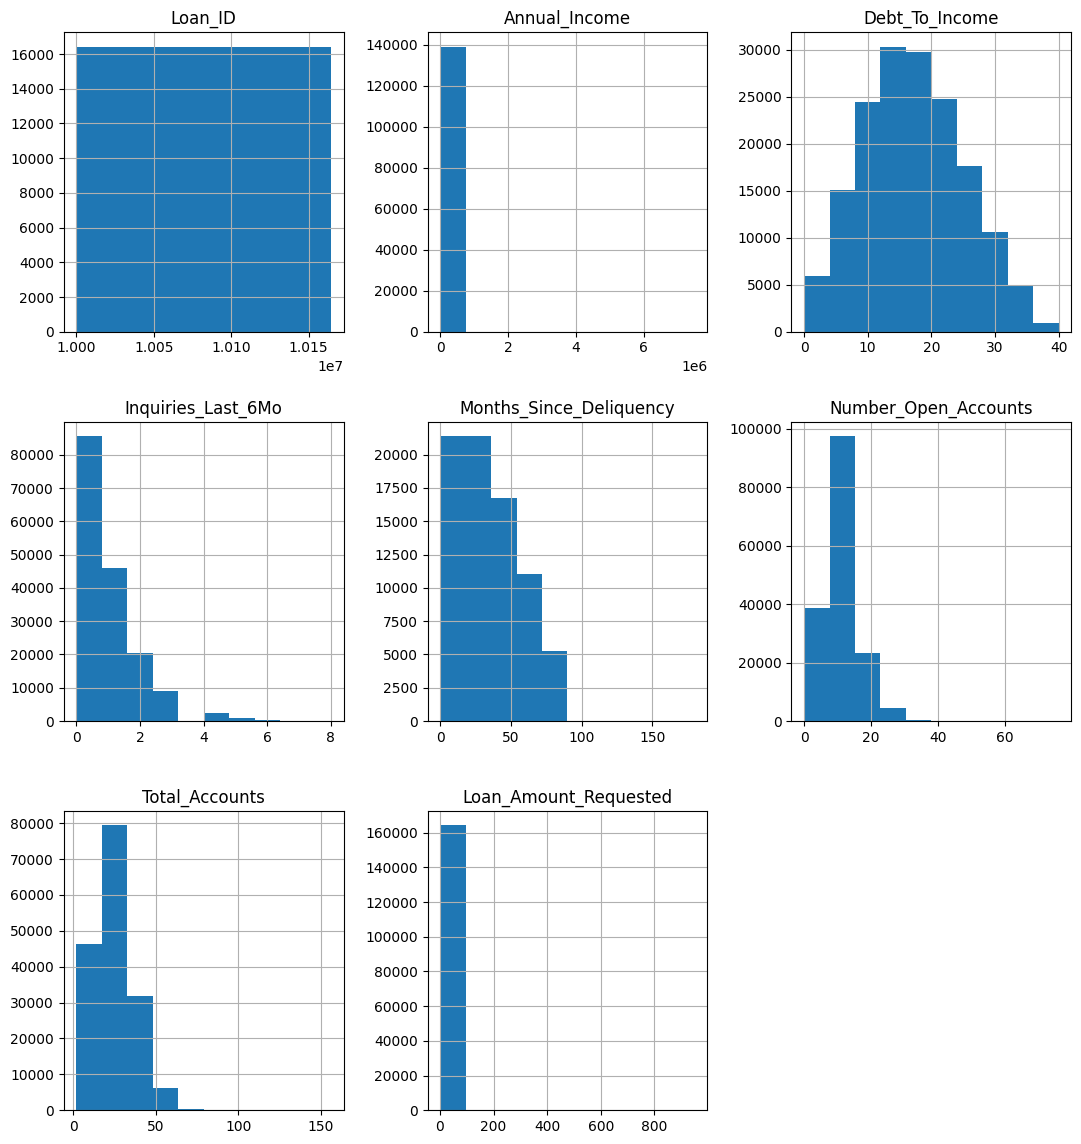

In [640]:
df[numerical_features].hist(figsize=(13, 14))
plt.show()

In [641]:
df['Inquiries_Last_6Mo'].value_counts()

Inquiries_Last_6Mo
0    85665
1    46071
2    20297
3     8863
4     2278
5      772
6      335
7       20
8        8
Name: count, dtype: int64

In [642]:
df['Inquiries_Last_6Mo'] = df['Inquiries_Last_6Mo'].replace(0, None)

In [643]:
df['Inquiries_Last_6Mo'] = df['Inquiries_Last_6Mo'].fillna(method='ffill')
df['Inquiries_Last_6Mo'] = df['Inquiries_Last_6Mo'].fillna(method='backfill')

Annual_Income

In [644]:
df['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [645]:
df['Annual_Income'] = df['Annual_Income'].fillna(method='ffill')

Months_Since_Deliquency

In [646]:
df['Months_Since_Deliquency'].isnull().sum()/len(df)*100

53.78828913814825

In [647]:
df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(method='ffill')
df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(method='backfill')

In [648]:
df=df.drop('Loan_ID', axis=1)
df.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7.000,0,0,68000.0,0,0,18.37,3.0,17.0,9,14,0,1
1,30.000,1,1,68000.0,1,1,14.93,3.0,17.0,12,24,0,3
2,24.725,2,1,75566.4,2,1,15.88,3.0,17.0,12,16,1,3
3,16.000,0,2,56160.0,2,1,14.34,3.0,17.0,16,22,1,3
4,17.000,3,2,96000.0,2,1,22.17,1.0,17.0,19,30,0,1


### Outlier

In [649]:
numerical_features.pop(0)

'Loan_ID'

In [651]:
def replace_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.3 * IQR
    upper_bound = Q3 + 1.3 * IQR
    
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

filtered_df = df.copy()
for column in numerical_features:
    filtered_df = replace_outliers_iqr(filtered_df, column)
df= filtered_df

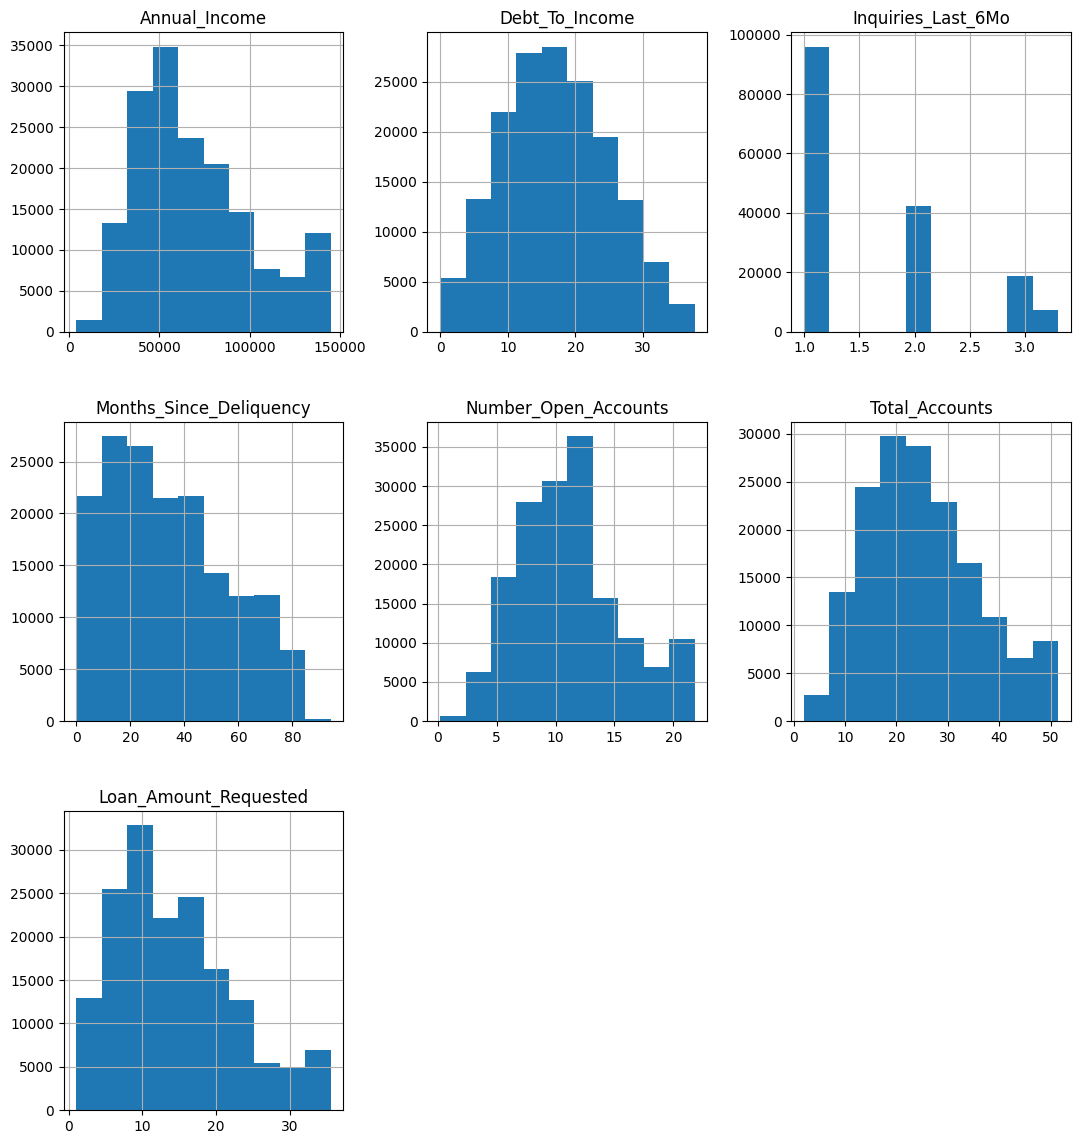

In [652]:
df[numerical_features].hist(figsize=(13, 14))
plt.show()

# Model

In [653]:
df.isnull().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [654]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [655]:
X=df.drop('Interest_Rate',axis=1)
y=df['Interest_Rate'].copy()

In [656]:
TRAIN_SIZE = 0.8
trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=42)

In [657]:
pipeline=make_pipeline(StandardScaler(), SVC(kernel='linear', C=1, gamma='scale'))
pipeline.fit(trainX, trainY)
predY=pipeline.predict(testX)
print(classification_report(testY, predY))

              precision    recall  f1-score   support

           1       0.20      0.00      0.00      6721
           2       0.46      0.75      0.57     14018
           3       0.51      0.42      0.46     12123

    accuracy                           0.48     32862
   macro avg       0.39      0.39      0.34     32862
weighted avg       0.43      0.48      0.41     32862



              precision    recall  f1-score   support

           1       0.41      0.02      0.04      6721
           2       0.46      0.71      0.56     14018
           3       0.51      0.46      0.48     12123

    accuracy                           0.48     32862
   macro avg       0.46      0.40      0.36     32862
weighted avg       0.47      0.48      0.42     32862

Confuction Matrix MLP 


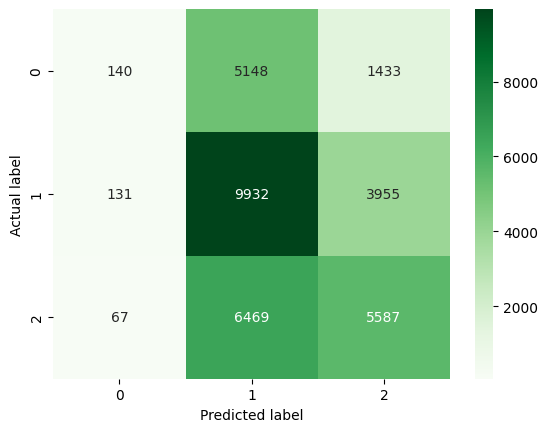

In [658]:
from sklearn.linear_model import LogisticRegression
pipeline2=make_pipeline(StandardScaler(), LogisticRegression(multi_class='auto', solver='liblinear'))
pipeline2.fit(trainX, trainY)
predY2=pipeline2.predict(testX)
print(classification_report(testY, predY2))
print(f"Confuction Matrix MLP ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY2), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

              precision    recall  f1-score   support

           1       0.48      0.12      0.19      6721
           2       0.48      0.64      0.55     14018
           3       0.53      0.55      0.54     12123

    accuracy                           0.50     32862
   macro avg       0.50      0.43      0.42     32862
weighted avg       0.50      0.50      0.47     32862

Confuction Matrix MLP 


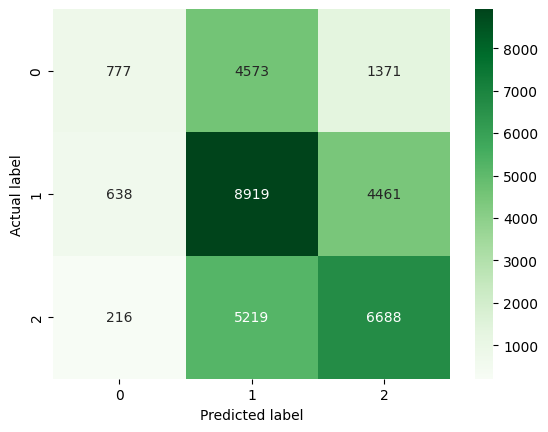

In [659]:
from sklearn.neural_network import MLPClassifier
pipeline3=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(10,70),activation='relu',alpha=0.001 ,learning_rate='adaptive',batch_size=32, max_iter=700))
pipeline3.fit(trainX, trainY)
predY3=pipeline3.predict(testX)
print(classification_report(testY, predY3))
print(f"Confuction Matrix MLP ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY3), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

              precision    recall  f1-score   support

           1       0.47      0.13      0.20      6721
           2       0.47      0.71      0.56     14018
           3       0.56      0.45      0.50     12123

    accuracy                           0.50     32862
   macro avg       0.50      0.43      0.42     32862
weighted avg       0.50      0.50      0.47     32862

Confuction Matrix MLP 


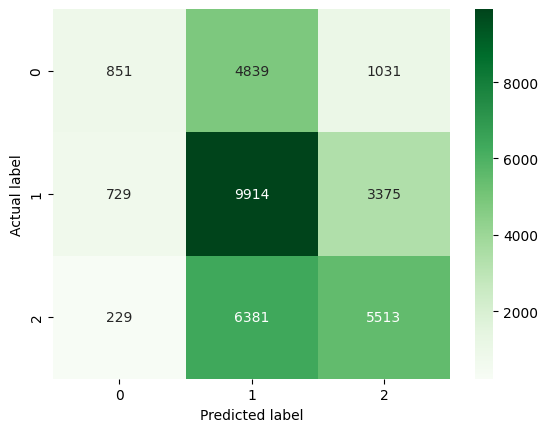

In [660]:
pipeline3=make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(8,70),activation='tanh',alpha=0.0001, learning_rate='adaptive',batch_size=50, max_iter=700))
pipeline3.fit(trainX, trainY)
predY3=pipeline3.predict(testX)
print(classification_report(testY, predY3))
print(f"Confuction Matrix MLP ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY3), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()